In [208]:
import pandas as pd
# De acuerdo a la pagina https://www.ins.gov.co/Noticias/Paginas/coronavirus-casos.aspx
# En colombia se están realizando los siguientes estudios de comorbilidades en los fallecidos con covid.
# Objetivos:
# Determinar la confiabilidad de las variables
# Generar un modelo de prediccion con Scikit-learn
# Generar un modelo de prediccion con FBprofet
#Observaciones: para ejecutarlo exactamente como está se debe guardar en la misma carpeta este script y el dataset
df_Comorbilidades=pd.read_csv('ComorbilidadesCovidColombia.csv')
df_Comorbilidades


,Edad,CerebroBascular,HTA,DM,Renal,Tiroides,Obesidad,Fumar,Cardiaca,Respiratoria,Cancer,Autoinmune,Vih,Otros,Ninguno,En_estudio,Total_Fallecidos
0,0-9,0,1,1,0,1,1,0,7,1,3,1,1,12,3,17,49
1,10-19,0,2,2,5,3,3,0,0,4,2,0,1,8,0,18,48
2,20-29,5,22,25,15,6,43,2,12,14,29,14,11,36,4,154,392
3,30-39,13,59,67,40,18,119,1,27,35,45,13,19,38,10,460,964
4,40-49,9,214,231,99,42,304,5,55,58,47,26,28,82,10,1065,2275
5,50-59,38,640,536,290,108,439,27,138,136,158,53,30,160,14,2155,4922
6,60-69,94,1398,1110,554,248,530,59,394,402,255,53,23,297,18,3574,9009
7,70-79,174,1946,1066,635,279,322,59,650,683,296,57,11,380,13,3761,10332
8,80-89,194,1684,710,483,246,141,37,626,837,239,30,5,448,8,2946,8634
9,90+,52,494,150,129,71,23,3,190,272,51,7,0,133,3,764,2342


In [209]:
df_Comorbilidades.describe()

,CerebroBascular,HTA,DM,Renal,Tiroides,Obesidad,Fumar,Cardiaca,Respiratoria,Cancer,Autoinmune,Vih,Otros,Ninguno,En_estudio,Total_Fallecidos
count,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,57.900000,646.000000,389.80000,225.000000,102.200000,192.500000,19.300000,209.900000,244.200000,112.50000,25.400000,12.900000,159.400000,8.300000,1491.400000,3896.700000
std,72.760566,753.319911,437.33938,247.110412,112.670414,193.100003,24.436084,255.630571,303.609325,113.45704,22.126907,11.445038,160.620464,5.755191,1488.946249,4035.810398
min,0.000000,1.000000,1.00000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.00000,0.000000,0.000000,8.000000,0.000000,17.000000,48.000000
25%,6.000000,31.250000,35.50000,21.250000,9.000000,28.000000,1.250000,15.750000,19.250000,33.00000,8.500000,2.000000,36.500000,3.250000,230.500000,535.000000
50%,25.500000,354.000000,190.50000,114.000000,56.500000,130.000000,4.000000,96.500000,97.000000,49.00000,20.000000,11.000000,107.500000,9.000000,914.500000,2308.500000
75%,83.500000,1208.500000,666.50000,434.750000,211.500000,317.500000,34.500000,343.000000,369.500000,218.75000,47.250000,22.000000,262.750000,12.250000,2748.250000,7706.000000
max,194.000000,1946.000000,1110.00000,635.000000,279.000000,530.000000,59.000000,650.000000,837.000000,296.00000,57.000000,30.000000,448.000000,18.000000,3761.000000,10332.000000


In [210]:
%matplotlib inline

#from __future__ import print_function
import numpy as np
import statsmodels.api as sm
#import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from numpy import linalg
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
# Tratamiento de datos
# ==============================================================================
#import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from __future__ import print_function
from patsy import dmatrices
from scipy import stats
from patsy import dmatrix

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


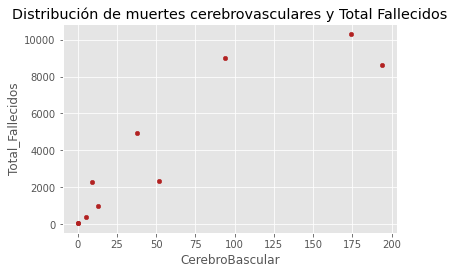

In [211]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

df_Comorbilidades.plot(
    x    = 'CerebroBascular',
    y    = 'Total_Fallecidos',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de muertes cerebrovasculares y Total Fallecidos');

In [212]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = df_Comorbilidades['CerebroBascular'], y =  df_Comorbilidades['Total_Fallecidos'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.910844477196717
P-value:  0.000247932267840743


# Dado que tenemos un alto coeficiente de correlacion r=0.91 y p-value= 0.000247
# intententaremos crear un modelo de regresion lineal con el objetivo de predecir 
# el numero de muertes asociada a los enfermos de covid con deficiencias cerebro basculares en colombia como inicio
# comenzaremos con las funciones basicas de statsmodel, para luego pasar a los modelos de prediccion 

In [213]:
y, X = dmatrices('Total_Fallecidos ~ CerebroBascular', data=df_Comorbilidades, return_type='dataframe')

In [214]:
mod1 = sm.OLS(y, X)
res1 = mod1.fit()
print(res1.summary())


                            OLS Regression Results                            
Dep. Variable:       Total_Fallecidos   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     38.96
Date:                Wed, 06 Oct 2021   Prob (F-statistic):           0.000248
Time:                        23:09:47   Log-Likelihood:                -87.843
No. Observations:                  10   AIC:                             179.7
Df Residuals:                       8   BIC:                             180.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         971.4871    729.251     

In [215]:
print('Parameters: ', res1.params)
print('R2: ', res1.rsquared)

Parameters:  Intercept          971.487115
CerebroBascular     50.521811
dtype: float64
R2:  0.8296376616397609


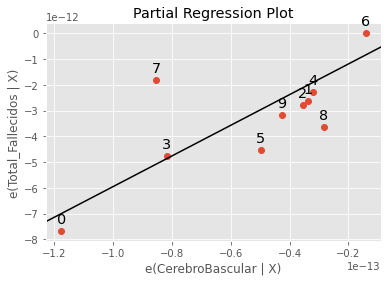

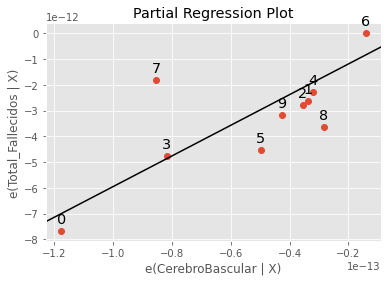

In [216]:
sm.graphics.plot_partregress('Total_Fallecidos', 'CerebroBascular', 'Edad' , data=df_Comorbilidades, obs_labels=True)

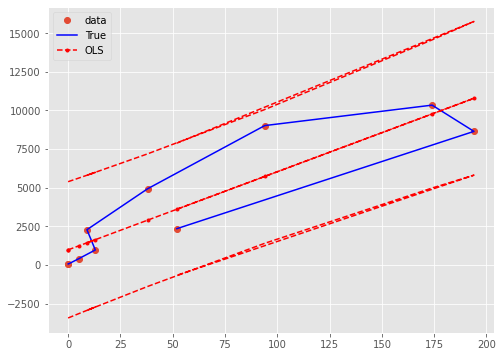

In [217]:
x=df_Comorbilidades['CerebroBascular']
y_true=df_Comorbilidades['Total_Fallecidos']
prstd, iv_l, iv_u = wls_prediction_std(res1)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res1.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best');
# Como podemos observar la estimacion OLS no es una curva lineal pero es lineal en parametros, por lo que procederemos a simular artificialmente la data 

In [218]:
nsample = len(df_Comorbilidades)
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

In [219]:
res11 = sm.OLS(y, X).fit()
print(res11.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     59.16
Date:                Wed, 06 Oct 2021   Prob (F-statistic):           7.56e-05
Time:                        23:09:51   Log-Likelihood:                -4.9059
No. Observations:                  10   AIC:                             17.81
Df Residuals:                       6   BIC:                             19.02
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4202      0.052      8.058      0.0

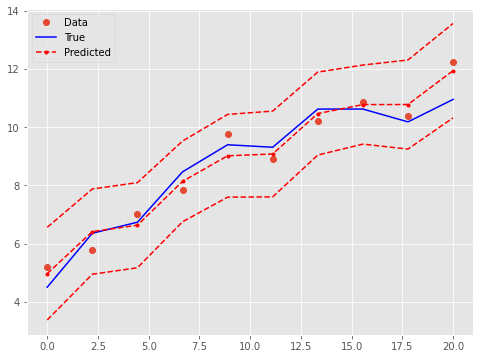

In [220]:
prstd, iv_l, iv_u = wls_prediction_std(res11)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="Data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res11.fittedvalues, 'r--.', label="Predicted")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
legend = ax.legend(loc="best")

In [221]:
R = [[0, 1, 0, 0], [0, 0, 1, 0]]
print(np.array(R))
print(res11.f_test(R))

[[0 1 0 0]
 [0 0 1 0]]
<F test: F=array([[3.22167261]]), p=0.11210947059087632, df_denom=6, df_num=2>


In [222]:
print('Parameters: ', res1.params)
print('Standard errors: ', res1.bse)
print('Predicted values: ', res1.predict())


print('Parameters: ', res11.params)
print('Standard errors: ', res11.bse)
print('Predicted values: ', res11.predict())

Parameters:  Intercept          971.487115
CerebroBascular     50.521811
dtype: float64
Standard errors:  Intercept          729.250836
CerebroBascular      8.094248
dtype: float64
Predicted values:  [  971.48711459   971.48711459  1224.09617205  1628.27066399
  1426.18341802  2891.3159513   5720.53739488  9762.28231427
 10772.71854412  3598.62131219]
Parameters:  [ 0.42019198  0.44406755 -0.00914809  5.19449811]
Standard errors:  [0.0521465  0.23198577 0.00457841 0.33881821]
Predicted values:  [ 4.96579578  6.41080235  6.63097261  8.13651505  9.01793058  9.08054919
 10.46993498 10.77895715 10.78103914 11.94542611]


In [223]:
# # Dado que hemos logrado un buen ajuste al modelo, procedemos a realizar con scikit learning la parte predictiva
#Dividiendo los datos
#=======================================================================
X = df_Comorbilidades['CerebroBascular']
y = df_Comorbilidades['Total_Fallecidos']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [224]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
mod11 = sm.OLS(endog=y_train, exog=X_train,)
mod11 = mod11.fit()
print(mod11.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     17.37
Date:                Wed, 06 Oct 2021   Prob (F-statistic):            0.00589
Time:                        23:09:53   Log-Likelihood:                -70.936
No. Observations:                   8   AIC:                             145.9
Df Residuals:                       6   BIC:                             146.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1179.3562    899.530      1.311      0.2

In [225]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
mod11.conf_int(alpha=0.05)

array([[-1021.71535723,  3380.42778029],
       [   19.41788402,    74.62286752]])

In [226]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = mod11.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,3624.415752,701.097253,1908.892576,5339.938927,-1519.784590,8768.616093
1,1179.356212,899.530390,-1021.715357,3380.427780,-4146.476441,6505.188864
2,1179.356212,899.530390,-1021.715357,3380.427780,-4146.476441,6505.188864
3,10301.309111,1769.095065,5972.489435,14630.128787,3800.658591,16801.959630
4,1602.539593,839.605061,-451.899979,3656.979166,-3664.385444,6869.464631
5,2966.130491,713.689320,1219.795637,4712.465344,-2188.426989,8120.687971
6,5599.271534,858.711575,3498.080007,7700.463061,313.934910,10884.608157
7,1790.621097,815.619067,-205.126864,3786.369057,-3453.688897,7034.931090


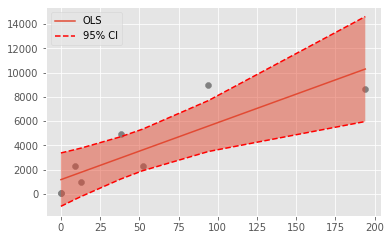

In [227]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = mod11.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.5)
ax.legend();

In [228]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = mod11.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")
# Dado a que efectivamente son mas las variables el R-squared nos muestra que siendo solamente esa varible podrian llegar a explicarse el 70% 
# De la variabilidad observada en las muertes 
# De acuerdo al error del test este es bastante grande dado que las distancias son grandes debido a que solamente estamos tratando de explicar
# con una variable el modelo completo, por lo que procederemos a realizar el este con todo el set de datos, por medio de una regresion lienal multiple.


El error (rmse) de test es: 997.1089855171377


# EL CASO DE LA DIABETES MELLITUS DM 

Text(0.5, 1.0, 'Distribución de muertes Diabetes Mellitus x Total Fallecidos')

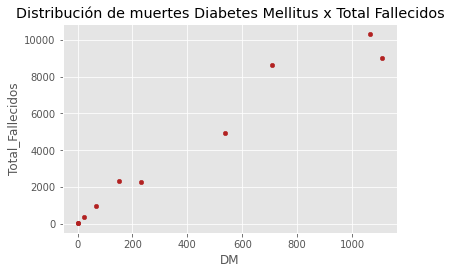

In [229]:
# Grafica de la Diabetes Mellitus DM
fig2, ax = plt.subplots(figsize=(6, 3.84))

df_Comorbilidades.plot(
    x    = 'DM',
    y    = 'Total_Fallecidos',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de muertes Diabetes Mellitus x Total Fallecidos');


In [230]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = df_Comorbilidades['DM'], y =  df_Comorbilidades['Total_Fallecidos'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])
#Dado que contamos con un ALTO coeficiente de correlacion hay una muy buena expectativa
# Dado es que es más de lo esperado.  

Coeficiente de correlación de Pearson:  0.9785388529273381
P-value:  9.044009723636608e-07


In [231]:
# prueba con el statsmodel
y, X = dmatrices('Total_Fallecidos ~ DM', data=df_Comorbilidades, return_type='dataframe')
mod2 = sm.OLS(y, X)
res2 = mod2.fit()
print(res2.summary())


                            OLS Regression Results                            
Dep. Variable:       Total_Fallecidos   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     180.4
Date:                Wed, 06 Oct 2021   Prob (F-statistic):           9.04e-07
Time:                        23:09:55   Log-Likelihood:                -80.896
No. Observations:                  10   AIC:                             165.8
Df Residuals:                       8   BIC:                             166.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    376.7858    382.731      0.984      0.3

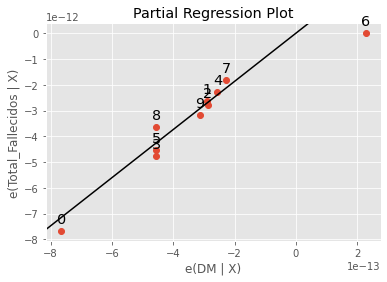

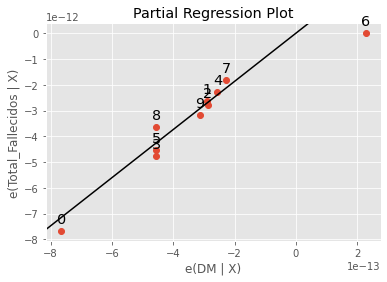

In [232]:
#Grafico2 Regresion lineal con Statsmodel para la diabetes melitus contra el total de fallecidos.
sm.graphics.plot_partregress('Total_Fallecidos', 'DM', 'Edad' , data=df_Comorbilidades, obs_labels=True)


In [233]:
# División de los datos en train y test
# ==============================================================================
X = df_Comorbilidades[['DM']]
y = df_Comorbilidades['Total_Fallecidos']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [234]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     86.01
Date:                Wed, 06 Oct 2021   Prob (F-statistic):           8.89e-05
Time:                        23:09:57   Log-Likelihood:                -65.454
No. Observations:                   8   AIC:                             134.9
Df Residuals:                       6   BIC:                             135.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        457.2869    484.286      0.944      0.3

In [235]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
modelo.conf_int(alpha=0.05)

array([[-727.71901771, 1642.2928105 ],
       [   6.44757891,   11.06913276]])

In [236]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,1771.040272,400.903488,790.064776,2752.015767,-862.803246,4404.883789
1,474.803608,482.995987,-707.044995,1656.652211,-2240.262666,3189.869882
2,466.045252,483.640658,-717.380803,1649.471308,-2249.708047,3181.798551
3,6675.719539,489.649970,5477.589225,7873.849854,3953.526489,9397.912589
4,2480.467094,370.881838,1572.951930,3387.982258,-126.907548,5087.841736
5,5151.765624,394.083443,4187.478178,6116.053070,2524.091932,7779.439316
6,10179.061873,799.168436,8223.567157,12134.556589,7048.761834,13309.361913
7,1044.096737,443.402184,-40.869320,2129.062795,-1630.220016,3718.413491


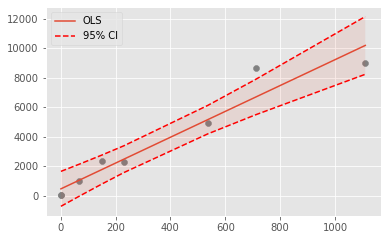

In [237]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();

In [238]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = mod11.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")



El error (rmse) de test es: 29004.15465097536


# El caso  de los problemas del sistema Renal

Text(0.5, 1.0, 'Distribución de muertes Sistema Renal y Total Fallecidos Covid')

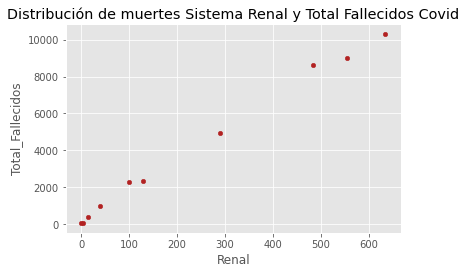

In [239]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

df_Comorbilidades.plot(
    x    = 'Renal',
    y    = 'Total_Fallecidos',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de muertes Sistema Renal y Total Fallecidos Covid');


In [240]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = df_Comorbilidades['Renal'], y =  df_Comorbilidades['Total_Fallecidos'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])


Coeficiente de correlación de Pearson:  0.9975755516867126
P-value:  1.5071820229928925e-10


In [241]:
# Matriz Statsmodel para la relación entre sistema renal y fallecidos por covid
#==============================================================================
y, X = dmatrices('Total_Fallecidos ~ Renal', data=df_Comorbilidades, return_type='dataframe')


In [242]:
# Summary

mod3 = sm.OLS(y, X)
res3 = mod3.fit()
print(res3.summary())


                            OLS Regression Results                            
Dep. Variable:       Total_Fallecidos   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1644.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):           1.51e-10
Time:                        23:10:00   Log-Likelihood:                -70.041
No. Observations:                  10   AIC:                             144.1
Df Residuals:                       8   BIC:                             144.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    230.9063    130.571      1.768      0.1

In [243]:
# parametros

print('Parameters: ', res3.params)
print('R2:         ', res3.rsquared)


Parameters:  Intercept    230.906255
Renal         16.292417
dtype: float64
R2:          0.9951569813230492


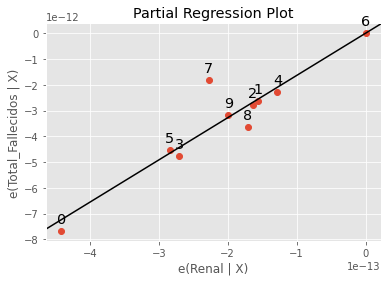

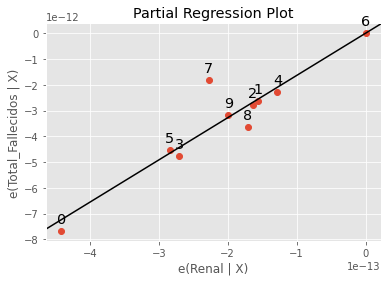

In [244]:
# Grafico regresion statsmodel para fallecidos por covid con problemas en el sistema renal
sm.graphics.plot_partregress('Total_Fallecidos', 'Renal', 'Edad' , data=df_Comorbilidades, obs_labels=True)


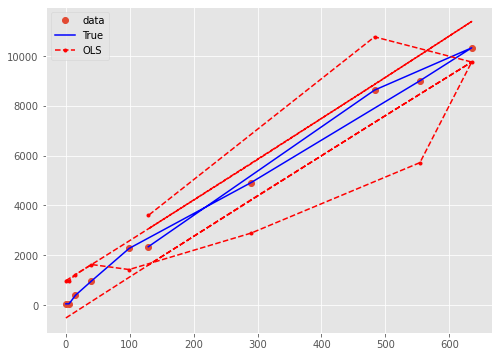

In [245]:
# Grafico 3.3 Estimacion OLS para Comoribilidad por fallas en el sistema renal y los fallecidos por covid
x=df_Comorbilidades['Renal']
y_true=df_Comorbilidades['Total_Fallecidos']
prstd, iv_l, iv_u = wls_prediction_std(res3)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res1.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best');
# Pese a que la grafica de la data no responde a una linea, si es lineal en parametros, por lo que podemos proseguir  

In [246]:
# Division de datos machine learning
# Dividiendo los datos pasaremos directamente a dividir los datos dado que no es necesario ajustar el modelo
X = df_Comorbilidades['Renal']
y = df_Comorbilidades['Total_Fallecidos']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


In [247]:
# Creación del modelo utilizando matrices scikitlearn
#=====================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True) # Adcionamos la variable constante para modelar
mod31 = sm.OLS(endog=y_train, exog=X_train,)
mod31 = mod31.fit()
print(mod31.summary()) 
# Como podemos observar la prediccion fue muy buena por lo que solamente se desvio un 0.002 frente a la original, por loque tenemos un buen estimador  


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     904.9
Date:                Wed, 06 Oct 2021   Prob (F-statistic):           8.95e-08
Time:                        23:10:03   Log-Likelihood:                -56.285
No. Observations:                   8   AIC:                             116.6
Df Residuals:                       6   BIC:                             116.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        217.1410    157.265      1.381      0.2

In [248]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
mod31.conf_int(alpha=0.05)


array([[-167.671587  ,  601.95365348],
       [  15.21861439,   17.91372528]])

In [249]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = mod31.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,2354.176942,118.867471,2063.318719,2645.035165,1524.626034,3183.727850
1,299.971882,155.348510,-80.152228,680.095992,-564.927269,1164.871034
2,217.141033,157.264603,-167.671587,601.953653,-649.828952,1084.111019
3,8218.601063,192.069538,7748.623834,8688.578292,7310.617143,9126.584983
4,1857.191847,125.277479,1550.648898,2163.734795,1022.012356,2692.371338
5,5021.330285,122.707932,4721.074791,5321.585779,4188.437996,5854.222574
6,9394.799121,224.961238,8844.338803,9945.259439,8442.663225,10346.935018
7,879.787827,142.705269,530.600612,1228.975041,28.032043,1731.543610


In [250]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = mod31.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')


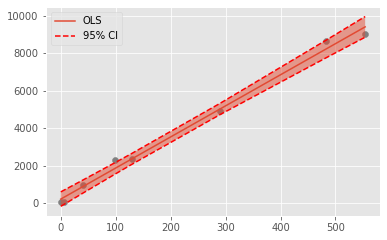

In [251]:
# Gráfico del modelo
# ==============================================================================
fig31, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.5)
ax.legend();
# Pese a que le indicamos los paramatros mas estrictos para realizar la predicción la maquina ha sido exitosa en el momento estimar

In [252]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = mod11.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")



El error (rmse) de test es: 14678.8499751493


# Un extraño caso que se ha podido comprobar en los estudios es la muerte de personas con problemas de la glandula tiroidea o del sistema endocrino
# por lo que procederemos a realizar la regresion statsmodel para que la maquina pueda predecir esta estimación.


Text(0.5, 1.0, 'Distribución de muertes Tiroides y Total Fallecidos')

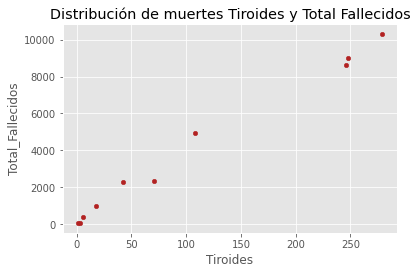

In [253]:
# Gráfico 4 problemas endocrinos en la glandula tiroidea 
# ==============================================================================
fig4, ax = plt.subplots(figsize=(6, 3.84))

df_Comorbilidades.plot(
    x    = 'Tiroides',
    y    = 'Total_Fallecidos',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de muertes Tiroides y Total Fallecidos');


In [254]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = df_Comorbilidades['Tiroides'], y =  df_Comorbilidades['Total_Fallecidos'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])
# Con la grafica y la correlacion de pearson, podemos ver existe una fuerte relacion entre ambas variables
# El p-value es tan estrecho que no tendremos problemas en realizar la regresión


Coeficiente de correlación de Pearson:  0.9949305987949427
P-value:  2.8718405186350843e-09


In [255]:
# Matriz patsy statsmodel para los problemas del sistema endocrino en relacion con muerte por covid

y, X = dmatrices('Total_Fallecidos ~ Tiroides', data=df_Comorbilidades, return_type='dataframe')


In [256]:
# Summary

mod4 = sm.OLS(y, X)
res4 = mod4.fit()
print(res4.summary())


                            OLS Regression Results                            
Dep. Variable:       Total_Fallecidos   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     783.1
Date:                Wed, 06 Oct 2021   Prob (F-statistic):           2.87e-09
Time:                        23:10:10   Log-Likelihood:                -73.723
No. Observations:                  10   AIC:                             151.4
Df Residuals:                       8   BIC:                             152.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    254.4936    188.340      1.351      0.2

In [257]:
# parametros

print('Parameters: ', res4.params)
print('R2:         ', res4.rsquared)


Parameters:  Intercept    254.493646
Tiroides      35.638027
dtype: float64
R2:          0.9898868964184631


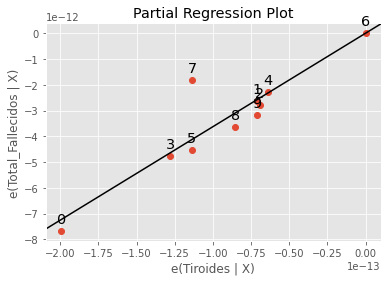

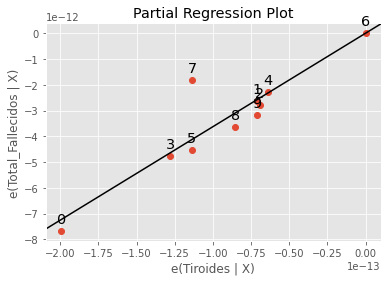

In [258]:
# Grafico Statsmodel para  la regresion del sistema endocrino y el total fallecidos 
sm.graphics.plot_partregress('Total_Fallecidos', 'Tiroides', 'Edad' , data=df_Comorbilidades, obs_labels=True)


# regresión lineal múltiple

In [259]:
# impresion de los modelos ajustados

print('Parameters: ', res4.params)
print('Standard errors: ', res4.bse)
print('Predicted values: ', res4.predict())
#En una predicción previa podemos ver que estos son bastaante cercanos 

Parameters:  Intercept    254.493646
Tiroides      35.638027
dtype: float64
Standard errors:  Intercept    188.339967
Tiroides       1.273556
dtype: float64
Predicted values:  [  290.13167255   361.40772646   468.32180731   895.97813072
  1751.29077755  4103.40055632  9092.72432946 10197.50316494
  9021.44827556  2784.79355913]


In [260]:
# Division de datos machine learning
# Dividiendo los datos procedemos a esconder los datos de entrenamiento en las variables test 
X = df_Comorbilidades['Tiroides']
y = df_Comorbilidades['Total_Fallecidos']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


In [261]:
# Creación del modelo utilizando matrices scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
mod41 = sm.OLS(endog=y_train, exog=X_train,)
mod41 = mod41.fit()
print(mod41.summary())
#en este caso vemos una desviacion extremadamente pequeña de 0.006

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     375.4
Date:                Wed, 06 Oct 2021   Prob (F-statistic):           1.22e-06
Time:                        23:10:14   Log-Likelihood:                -59.766
No. Observations:                   8   AIC:                             123.5
Df Residuals:                       6   BIC:                             123.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        287.2761    241.051      1.192      0.2

In [262]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
mod41.conf_int(alpha=0.05)


array([[-302.55512872,  877.10729484],
       [  30.75758773,   39.64890164]])

In [263]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = mod41.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,2786.706456,177.662117,2351.982918,3221.429994,1509.873843,4063.539069
1,392.885817,237.299050,-187.764040,973.535674,-940.707533,1726.479167
2,322.479328,239.793289,-264.273712,909.232368,-1013.782659,1658.741315
3,8947.274276,329.011199,8142.212874,9752.335679,7501.784453,10392.764099
4,1765.812360,195.919263,1286.415194,2245.209526,473.087095,3058.537625
5,4089.226509,175.848297,3658.941227,4519.511791,2813.898163,5364.554856
6,9017.680766,332.104337,8205.050729,9830.310802,7567.961985,10467.399547
7,920.934487,219.608075,383.572887,1458.296088,-394.388461,2236.257435


In [264]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = mod41.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')


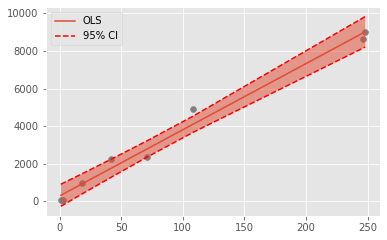

In [265]:
# Gráfico del modelo
# ==============================================================================
fig41, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.5)
ax.legend();


In [266]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = mod41.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")



El error (rmse) de test es: 174.75500013542077


# Otra de las variables estudiadas en el Colombia es el de la Obesidad, como factor de muerte por covid, por lo que procederemos a investigar
# si es una variable real, que cause fallecimientos por covid. 

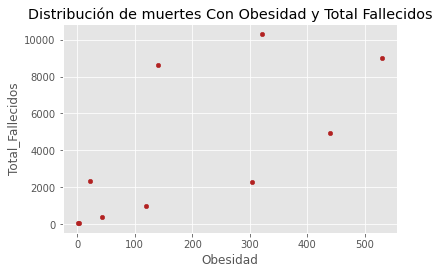

In [267]:
# Gráfico
# ==============================================================================
fig5, ax = plt.subplots(figsize=(6, 3.84))

df_Comorbilidades.plot(
    x    = 'Obesidad',
    y    = 'Total_Fallecidos',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de muertes Con Obesidad y Total Fallecidos');
# En este caso si nos encotramos con una relacion bastante dispersa, por loque porcederemos a estudiar su R2

In [268]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = df_Comorbilidades['Obesidad'], y =  df_Comorbilidades['Total_Fallecidos'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])
# La relacion de pearson no es tan fuerte como las variables anteriores y su p-value casi llega al 0.05 por lo que procereremos realizar la prueba simple 
# en statsmodel 

Coeficiente de correlación de Pearson:  0.6923330109166669
P-value:  0.02650206683148147


In [269]:
y, X = dmatrices('Total_Fallecidos ~ Obesidad', data=df_Comorbilidades, return_type='dataframe')


In [270]:
mod5 = sm.OLS(y, X)
res5 = mod5.fit()
print(res5.summary())
# Desde aqui ya podemos visualizar que su R2 se bastante por lo que solamente podemos explicar en 47% que posiblemente 
# las personas fallecidas tuvieran problemas de sobrepeso 


                            OLS Regression Results                            
Dep. Variable:       Total_Fallecidos   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     7.365
Date:                Wed, 06 Oct 2021   Prob (F-statistic):             0.0265
Time:                        23:10:17   Log-Likelihood:                -93.429
No. Observations:                  10   AIC:                             190.9
Df Residuals:                       8   BIC:                             191.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1111.2572   1416.888      0.784      0.4

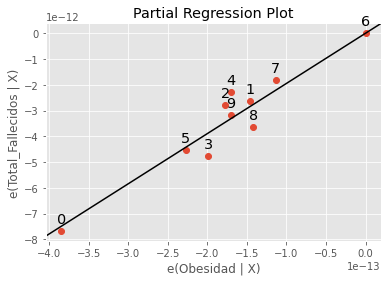

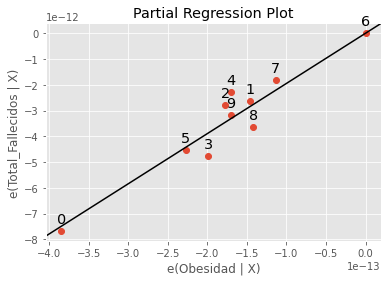

In [271]:
# Visualizamos la grafica del modelo
# Grafico 
sm.graphics.plot_partregress('Total_Fallecidos', 'Obesidad', 'Edad' , data=df_Comorbilidades, obs_labels=True)
# Vemos en efecto una concentración intermedia por lo que es posible que sean otras causas asociadas a la obesidad
# las que generen la muerte por covid. 

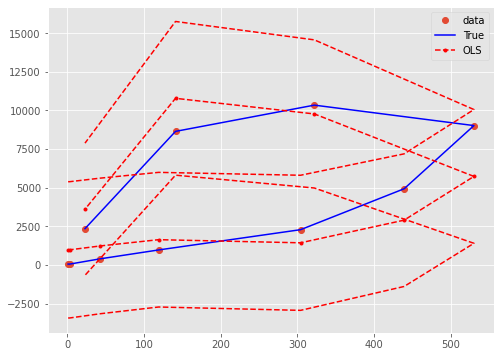

In [272]:
# Grafico3.3
x=df_Comorbilidades['Obesidad']
y_true=df_Comorbilidades['Total_Fallecidos']
prstd, iv_l, iv_u = wls_prediction_std(res1)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res1.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best');
# A diferencia de las otras estimaciones podemos ver que la variable casi tiene un comportamiento circular y muy poco lineal 

In [273]:
#Ajuste

nsample = len(df_Comorbilidades)
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)



In [274]:
# modelo ajustado
mod51 = sm.OLS(y, X)
res51 = mod51.fit()
print(res51.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     178.1
Date:                Wed, 06 Oct 2021   Prob (F-statistic):           2.98e-06
Time:                        23:10:21   Log-Likelihood:                0.43630
No. Observations:                  10   AIC:                             7.127
Df Residuals:                       6   BIC:                             8.338
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5360      0.031     17.536      0.0

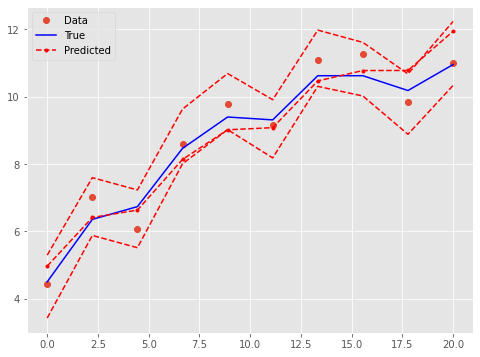

In [275]:
# Grafica del modelo ajustado

prstd, iv_l, iv_u = wls_prediction_std(res51)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="Data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res11.fittedvalues, 'r--.', label="Predicted")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
legend = ax.legend(loc="best")



In [276]:
# pruebas del modelo ajustado

R = [[0, 1, 0, 0], [0, 0, 1, 0]]
print(np.array(R))
print(res51.f_test(R))


[[0 1 0 0]
 [0 0 1 0]]
<F test: F=array([[54.3301664]]), p=0.00014328943069336233, df_denom=6, df_num=2>


In [277]:
# impresion de los modelos ajustados

print('Parameters: ', res51.params)
print('Standard errors: ', res51.bse)
print('Predicted values: ', res51.predict())


Parameters:  [ 0.53597     0.98326491 -0.02344508  4.94426016]
Standard errors:  [0.03056452 0.13597331 0.00268353 0.19859078]
Predicted values:  [ 4.35813319  6.73631319  6.37093372  8.82015804  9.85592793  9.04720044
 11.14473451 10.81860401  9.78134146 11.28618438]


In [278]:
# Division de datos machine learning
# Dividiendo los datos
X = df_Comorbilidades['Obesidad']
y = df_Comorbilidades['Total_Fallecidos']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


In [279]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
mod511 = sm.OLS(endog=y_train, exog=X_train,)
mod511 = mod511.fit()
print(mod511.summary())
# Aqui podemos ver que pese a que las variables ficticias arreglaron muchisimo, la prediccion se alejo muchisimo de los r2 reales  

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     4.941
Date:                Wed, 06 Oct 2021   Prob (F-statistic):             0.0679
Time:                        23:10:23   Log-Likelihood:                -73.972
No. Observations:                   8   AIC:                             151.9
Df Residuals:                       6   BIC:                             152.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1223.9940   1457.950      0.840      0.4

In [280]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
mod511.conf_int(alpha=0.05)


array([[-2.34347999e+03,  4.79146801e+03],
       [-1.19227489e+00,  2.48474645e+01]])

In [281]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = mod511.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,1496.028692,1373.547202,-1864.920232,4856.977616,-6348.961423,9341.018806
1,1259.476795,1446.632697,-2280.305893,4799.259484,-6663.777189,9182.730780
2,1235.821606,1454.167573,-2322.398260,4794.041471,-6695.686500,9167.329712
3,2891.684880,1063.765450,288.744596,5494.625164,-4659.685218,10443.054977
4,4819.582835,1177.037623,1939.475529,7699.690140,-2831.751057,12470.916726
5,6416.308135,1653.676150,2369.908369,10462.707901,-1745.875598,14578.491868
6,7492.619263,2055.820191,2462.208479,12523.030047,-1199.499287,16184.737813
7,2631.477794,1101.167737,-62.982590,5325.938178,-4951.925729,10214.881317


In [282]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = mod511.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')



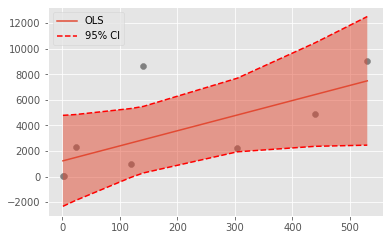

In [283]:
# Gráfico del modelo
# ==============================================================================
fig511, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.5)
ax.legend();
# En este caso los limites de confianza fueron mucho mas grandes, por lo que como lo mencionamos anteriormente,
# para utilizar esta variable se deberan encontrar otras comorbilidades asociadas a la obesidad, para poder tener una mejor estimación 

In [284]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = mod511.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")



El error (rmse) de test es: 3865.3637217277474


# Ademas de la obesidad tenemos otra de las variables de investigación en colombia, que es el fumar

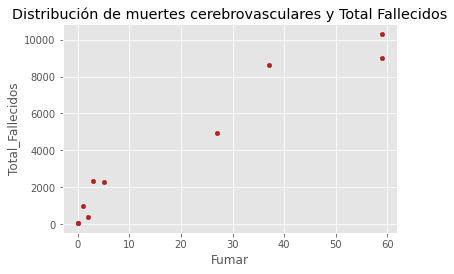

In [285]:
# Gráfico de tabaquismo y otras sustancias
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

df_Comorbilidades.plot(
    x    = 'Fumar',
    y    = 'Total_Fallecidos',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de muertes cerebrovasculares y Total Fallecidos');
# En este caso la grafica si muestra una un punteo mas homogeneo que la obesidad 

In [286]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = df_Comorbilidades['Fumar'], y =  df_Comorbilidades['Total_Fallecidos'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])
# Tenemos una relacion fuerte y un p-value más arriba de lo esperado

Coeficiente de correlación de Pearson:  0.9706867100322575
P-value:  3.1180061908180723e-06


In [287]:
y, X = dmatrices('Total_Fallecidos ~ Fumar', data=df_Comorbilidades, return_type='dataframe')


In [288]:
mod6 = sm.OLS(y, X)
res6 = mod6.fit()
print(res6.summary())
# En este caso si tenemos un R2  muy superior al de la obesidad

                            OLS Regression Results                            
Dep. Variable:       Total_Fallecidos   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     130.5
Date:                Wed, 06 Oct 2021   Prob (F-statistic):           3.12e-06
Time:                        23:10:27   Log-Likelihood:                -82.436
No. Observations:                  10   AIC:                             168.9
Df Residuals:                       8   BIC:                             169.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    802.5916    423.343      1.896      0.0

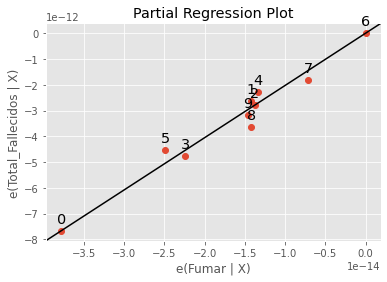

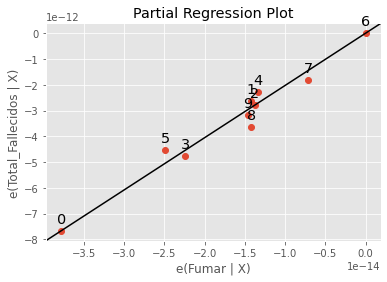

In [289]:
# Grafico 
sm.graphics.plot_partregress('Total_Fallecidos', 'Fumar', 'Edad' , data=df_Comorbilidades, obs_labels=True)
# La grafica nos muestra un modelo mas homgeneo

In [290]:
# Prediccion simple de statsmodel
print('Parameters: ', res6.params)
print('Standard errors: ', res6.bse)
print('Predicted values: ', res6.predict())



Parameters:  Intercept    802.59156
Fumar        160.31650
dtype: float64
Standard errors:  Intercept    423.342678
Fumar         14.034444
dtype: float64
Predicted values:  [  802.59155952   802.59155952  1123.22455853   962.90805902
  1604.17405705  5131.1370462  10261.26503042 10261.26503042
  6734.30204127  1283.54105804]


In [291]:
# Division de datos machine learning
# Dividiendo los datos
X = df_Comorbilidades['Fumar']
y = df_Comorbilidades['Total_Fallecidos']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


In [292]:
# Creación del modelo utilizando matrices scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
mod61 = sm.OLS(endog=y_train, exog=X_train,)
mod61 = mod61.fit()
print(mod61.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     64.45
Date:                Wed, 06 Oct 2021   Prob (F-statistic):           0.000200
Time:                        23:10:30   Log-Likelihood:                -66.523
No. Observations:                   8   AIC:                             137.0
Df Residuals:                       6   BIC:                             137.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        950.5044    515.931      1.842      0.1

In [293]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
mod61.conf_int(alpha=0.05)


array([[-311.93374911, 2212.94262571],
       [ 108.69964619,  204.01193704]])

In [294]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = mod61.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,1419.571813,481.712124,240.864708,2598.278918,-1612.404144,4451.547770
1,950.504438,515.931209,-311.933749,2212.942626,-2114.993554,4016.002431
2,950.504438,515.931209,-311.933749,2212.942626,-2114.993554,4016.002431
3,6735.668728,567.735662,5346.469610,8124.867846,3615.828676,9855.508781
4,1732.283396,461.606727,602.772427,2861.794366,-1280.908067,4745.474860
5,5172.110812,452.477423,4064.938445,6279.283179,2167.221727,8176.999897
6,10175.496144,920.899438,7922.136396,12428.855891,6586.463138,13764.529149
7,1106.860230,504.030653,-126.458348,2340.178808,-1946.760978,4160.481437


In [295]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = mod61.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')



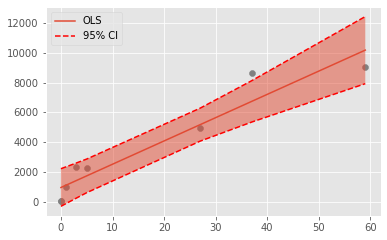

In [296]:
# Gráfico del modelo
# ==============================================================================
fig611, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.5)
ax.legend();


In [297]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = mod61.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")
# Un error medio de 625.90 de 12000 visualizaciones, es error bajo, por lo que el tabaquismo y otras sustancias, si hacen parte directa de las 
# Comorbilidades que generan muerte por covid.


El error (rmse) de test es: 625.9036719801518


# La siguiente variable de estudio en colombia son los problemas cardiacos presentes en el sistema cardiovascular

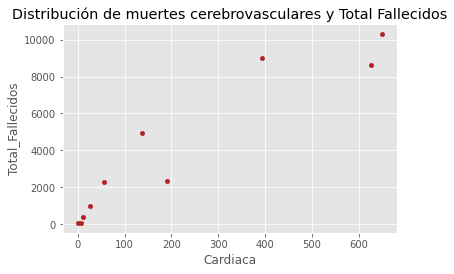

In [298]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

df_Comorbilidades.plot(
    x    = 'Cardiaca',
    y    = 'Total_Fallecidos',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de muertes cerebrovasculares y Total Fallecidos');



In [299]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = df_Comorbilidades['Cardiaca'], y =  df_Comorbilidades['Total_Fallecidos'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])
# Contamos con una buena correlacion y un p-value muy parecido al de la obesidad

Coeficiente de correlación de Pearson:  0.9446837858753492
P-value:  3.83057299130976e-05


In [300]:
y, X = dmatrices('Total_Fallecidos ~ Cardiaca', data=df_Comorbilidades, return_type='dataframe')


In [301]:
# Summary

mod7 = sm.OLS(y, X)
res7 = mod7.fit()
print(res7.summary())
# sin embargo los la regresion de los r2 es mucho mas cercana a 1 que en el caso de la obesidad

                            OLS Regression Results                            
Dep. Variable:       Total_Fallecidos   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     66.37
Date:                Wed, 06 Oct 2021   Prob (F-statistic):           3.83e-05
Time:                        23:10:33   Log-Likelihood:                -85.544
No. Observations:                  10   AIC:                             175.1
Df Residuals:                       8   BIC:                             175.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    766.1772    587.177      1.305      0.2

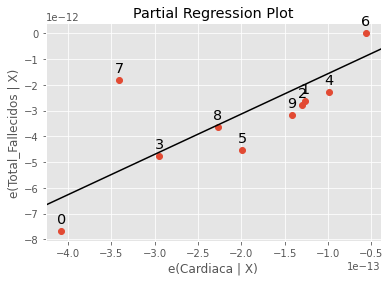

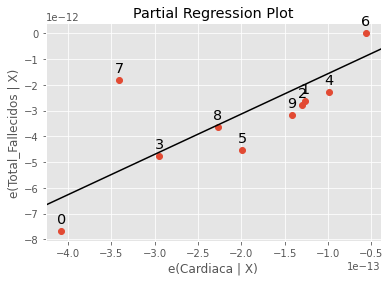

In [302]:
# Grafico 
sm.graphics.plot_partregress('Total_Fallecidos', 'Cardiaca', 'Edad' , data=df_Comorbilidades, obs_labels=True)


In [303]:
#Prediccion simple
print('Parameters: ', res7.params)
print('Standard errors: ', res7.bse)
print('Predicted values: ', res7.predict())


Parameters:  Intercept    766.177247
Cardiaca      14.914353
dtype: float64
Standard errors:  Intercept    587.176540
Cardiaca       1.830727
dtype: float64
Predicted values:  [  870.57772041   766.17724748   945.14948678  1168.86478591
  1586.46667763  2824.35799949  6642.43243802 10460.50687654
 10102.56239793  3599.90436982]


In [304]:
# Division de datos machine learning
# Dividiendo los datos
X = df_Comorbilidades['Cardiaca']
y = df_Comorbilidades['Total_Fallecidos']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


In [305]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
mod71 = sm.OLS(endog=y_train, exog=X_train,)
mod71 = mod71.fit()
print(mod71.summary())
# Para este caso la maquina estimó por encima de la recta real por lo que seria recomendable revisar otras comorbilides asociadas al problema cardiaco. 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     29.81
Date:                Wed, 06 Oct 2021   Prob (F-statistic):            0.00157
Time:                        23:10:36   Log-Likelihood:                -69.229
No. Observations:                   8   AIC:                             142.5
Df Residuals:                       6   BIC:                             142.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        868.0466    747.208      1.162      0.2

In [306]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
mod71.conf_int(alpha=0.05)


array([[-960.30568464, 2696.39886147],
       [   8.17884922,   21.4643342 ]])

In [307]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = mod71.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,3684.149014,566.854652,2297.105649,5071.192379,-472.412743,7840.710771
1,868.046588,747.208067,-960.305685,2696.398861,-3455.839207,5191.932384
2,971.797730,734.947418,-826.553815,2770.149276,-3339.487997,5283.083458
3,10146.363001,1337.526326,6873.553986,13419.172016,5041.032925,15251.693078
4,1683.234133,659.541355,69.394575,3297.073690,-2554.406066,5920.874332
5,2913.426245,577.321566,1500.771265,4326.081224,-1251.752074,7078.604564
6,6707.753724,811.926160,4721.041982,8694.465465,2314.561276,11100.946172
7,1268.229565,701.574575,-448.461575,2984.920705,-3009.637288,5546.096418


In [308]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = mod11.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')



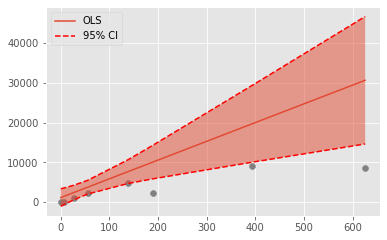

In [309]:
fig711, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.5)
ax.legend();


In [310]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = mod71.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")



El error (rmse) de test es: 477.765771837216


# Una de las causas mas asociadas a la muerte por covid son los problemas en el sistema respiratorio, por lo que procederemos a estudiar esta variable

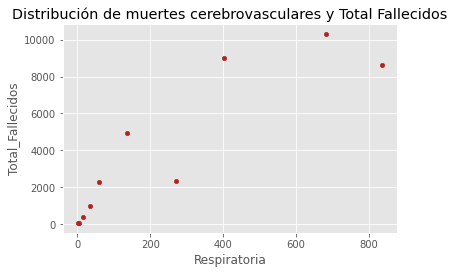

In [311]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

df_Comorbilidades.plot(
    x    = 'Respiratoria',
    y    = 'Total_Fallecidos',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de muertes cerebrovasculares y Total Fallecidos');
# Este caso se empieza por una recta que se va volviendo dispersa, por lo que podemos ver que hay varias comorbilidades asociadas 
# a los problemas respiratorios

In [312]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = df_Comorbilidades['Respiratoria'], y =  df_Comorbilidades['Total_Fallecidos'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])
# Pese a la alta dispersión tenemos una correlacion fuerte entre las variables y un p-value muy por debajo de lo esperado. 

Coeficiente de correlación de Pearson:  0.8947511924051
P-value:  0.00047196863561158243


In [313]:
y, X = dmatrices('Total_Fallecidos ~ Respiratoria', data=df_Comorbilidades, return_type='dataframe')


In [314]:
mod8 = sm.OLS(y, X)
res8 = mod8.fit()
print(res8.summary())
# en este caso tenemos un buen R2 que complementa con la prueba de correlacion y el p-value

                            OLS Regression Results                            
Dep. Variable:       Total_Fallecidos   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     32.12
Date:                Wed, 06 Oct 2021   Prob (F-statistic):           0.000472
Time:                        23:10:39   Log-Likelihood:                -88.631
No. Observations:                  10   AIC:                             181.3
Df Residuals:                       8   BIC:                             181.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      992.2521    792.513      1.252   

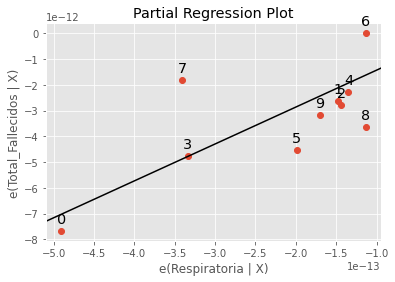

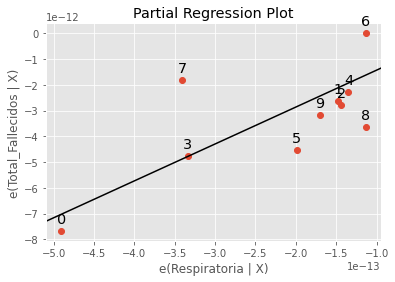

In [315]:
# Grafico 
sm.graphics.plot_partregress('Total_Fallecidos', 'Respiratoria', 'Edad' , data=df_Comorbilidades, obs_labels=True)
# En esta grafica de regresion parcial podemos ver unos puntos que se alejan bastante de la recta los cuales pueden ser ruido
# u otras comorbilidades asociadas 

In [316]:
# impresion de los modelos ajustados

print('Parameters: ', res8.params)
print('Standard errors: ', res8.bse)
print('Predicted values: ', res8.predict())


Parameters:  Intercept       992.252076
Respiratoria     11.893726
dtype: float64
Standard errors:  Intercept       792.513332
Respiratoria      2.098724
dtype: float64
Predicted values:  [ 1004.14580218  1039.82698061  1158.76424203  1408.53249102
  1682.0881923   2609.7988314   5773.52998526  9115.66703126
 10947.30085718  4227.34558676]


In [317]:
# Division de datos machine learning
# Dividiendo los datos
X = df_Comorbilidades['Respiratoria']
y = df_Comorbilidades['Total_Fallecidos']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


In [318]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
mod81 = sm.OLS(endog=y_train, exog=X_train,)
mod81 = mod81.fit()
print(mod81.summary())
# esta prediccion fue mas alta de lo que han sido las otras, sin embargo tanto la prueba de correlacion y la p-value,
# por lo que si es muy posible que nos encontremos frente a ruido en los puntos.   

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     15.00
Date:                Wed, 06 Oct 2021   Prob (F-statistic):            0.00824
Time:                        23:10:42   Log-Likelihood:                -71.365
No. Observations:                   8   AIC:                             146.7
Df Residuals:                       6   BIC:                             146.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1208.2108    951.973      1.269      0.2

In [319]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
mod81.conf_int(alpha=0.05)
#================================================================================
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = mod81.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,4103.929584,754.052008,2258.830790,5949.028378,-1335.623978,9543.483146
1,1250.794947,945.084865,-1061.744407,3563.334301,-4364.558262,6866.148156
2,1218.856873,950.243911,-1106.306212,3544.019958,-4401.706868,6839.420614
3,10118.933576,1855.100225,5579.666856,14658.200297,3278.663424,16959.203728
4,1825.680285,860.490068,-279.863058,3931.223627,-3707.642963,7359.003532
5,2656.070216,773.066651,764.444267,4547.696166,-2799.440954,8111.581386
6,5487.912804,895.651466,3296.332618,7679.492989,-78.717874,11054.543482
7,1580.821715,894.489366,-607.914913,3769.558343,-3984.690069,7146.333499


In [320]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = mod81.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')



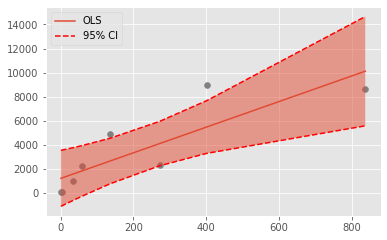

In [321]:
# Gráfico del modelo
# ==============================================================================
fig811, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.5)
ax.legend();
# Pese a todo tenemos un ajuste muy bueno. 

In [322]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = mod11.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")



El error (rmse) de test es: 16268.925198910243


# otra de las comorbilidades estudiadas en las variables del covid en colombia es la de los pacientes con cancer,
# por lo que entrarermos a estudiar la incidencia de esta enfermedad con respecto al covid.

Text(0.5, 1.0, 'Distribución de muertes Cancer y Total Fallecidos')

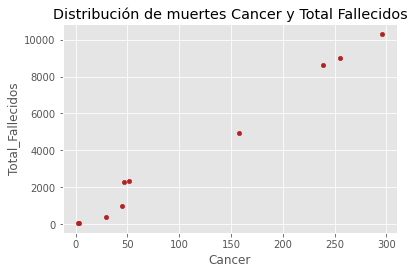

In [323]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

df_Comorbilidades.plot(
    x    = 'Cancer',
    y    = 'Total_Fallecidos',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de muertes Cancer y Total Fallecidos');


In [324]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = df_Comorbilidades['Cancer'], y =  df_Comorbilidades['Total_Fallecidos'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])
# sin duda alguna podemos observar una muy fuerte correlacion entre los enfermos de cancer que adquirieron el virus y fallecieron
# practicamente es muy explicable dado que la correlacion de pearson es de 0.99 y el p-value es extremadamente pequeño,
# por lo que contamos con un muy buen estimador.

Coeficiente de correlación de Pearson:  0.9935257708129696
P-value:  7.626973857688245e-09


In [325]:
# Matriz Statsmodel simple
y, X = dmatrices('Total_Fallecidos ~ Cancer', data=df_Comorbilidades, return_type='dataframe')


In [326]:
mod9 = sm.OLS(y, X)
res9 = mod9.fit()
print(res9.summary())


                            OLS Regression Results                            
Dep. Variable:       Total_Fallecidos   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     611.8
Date:                Wed, 06 Oct 2021   Prob (F-statistic):           7.63e-09
Time:                        23:10:45   Log-Likelihood:                -74.942
No. Observations:                  10   AIC:                             153.9
Df Residuals:                       8   BIC:                             154.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -79.1589    222.453     -0.356      0.7

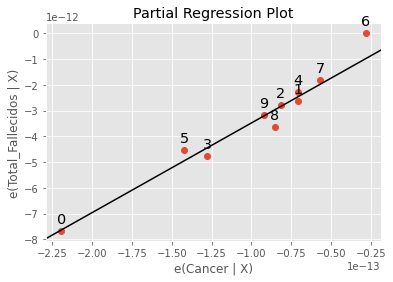

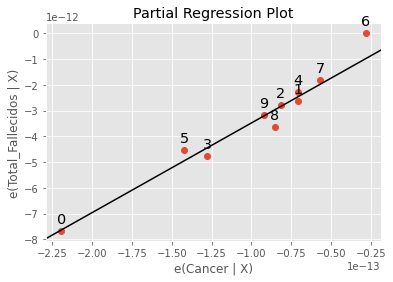

In [327]:
# Grafico de la regresion statsmodel
#===================================
sm.graphics.plot_partregress('Total_Fallecidos', 'Cancer', 'Edad' , data=df_Comorbilidades, obs_labels=True)


In [328]:
# Prediccion simple de scikit learning
print('Parameters: ', res9.params)
print('Standard errors: ', res9.bse)
print('Predicted values: ', res9.predict())
# En esta prediccion simple podemos que la misma está muy cerca de 0 para todos los predictores, por lo que este es un muy buen modelo para machine learning

Parameters:  Intercept   -79.158905
Cancer       35.340968
dtype: float64
Standard errors:  Intercept    222.453384
Cancer         1.428760
dtype: float64
Predicted values:  [ 2.68639995e+01 -8.47696856e+00  9.45729169e+02  1.51118466e+03
  1.58186659e+03  5.50471405e+03  8.93278795e+03  1.03817676e+04
  8.36733246e+03  1.72323047e+03]


In [329]:
# division de datos machine learning
#Dividiendo los datos
X = df_Comorbilidades['Cancer']
y = df_Comorbilidades['Total_Fallecidos']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


In [330]:
# Creación del modelo utilizando matrices en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
mod91 = sm.OLS(endog=y_train, exog=X_train,)
mod91 = mod91.fit()
print(mod91.summary())
# la prediccion de los r2 nos muestra que solamente tuvo un 0.05 de diferencia, lo cual está en los rangos aceptables

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     355.1
Date:                Wed, 06 Oct 2021   Prob (F-statistic):           1.44e-06
Time:                        23:10:48   Log-Likelihood:                -59.985
No. Observations:                   8   AIC:                             124.0
Df Residuals:                       6   BIC:                             124.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.2473    257.217      0.141      0.8

In [331]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
mod91.conf_int(alpha=0.05)


array([[-593.13910162,  665.63360526],
       [  30.40435681,   39.47819815]])

In [332]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = mod91.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,1818.252403,200.090557,1328.648449,2307.856358,490.834777,3145.670030
1,106.129807,254.556469,-516.747434,729.007047,-1276.006793,1488.266407
2,141.071084,253.236287,-478.575787,760.717956,-1239.612721,1521.754889
3,8387.212570,313.375960,7620.409221,9154.015919,6934.520965,9839.904175
4,1678.487293,203.565395,1180.380718,2176.593869,347.910094,3009.064493
5,5556.969094,208.199115,5047.524214,6066.413974,4222.105951,6891.832237
6,8946.273010,338.195348,8118.738804,9773.807215,7460.628912,10431.917107
7,1608.604739,205.381215,1106.055011,2111.154466,276.357857,2940.851620


In [333]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = mod91.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')


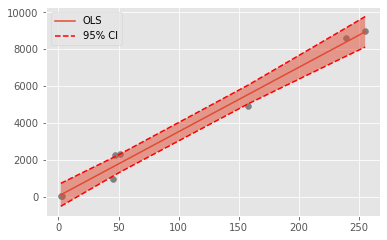

In [334]:
# Gráfico del modelo
# ==============================================================================
fig91, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.5)
ax.legend();


In [335]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = mod91.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")



El error (rmse) de test es: 466.1334944619256


# La correlación entre virus como el VIH y el coronavirus, es otro de los estudios que se están llevando a cabo, por parte de las
# autoridades epidemiologicas de Colombia, por lo que es pertinente realizar el modelo para saber en que porcentaje se encuentra esa correlacion´.

Text(0.5, 1.0, 'Distribución de muertes VIH y Total Fallecidos')

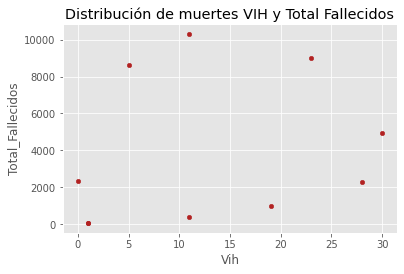

In [336]:
# Gráfico relacion de VIH SARS COV
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

df_Comorbilidades.plot(
    x    = 'Vih',
    y    = 'Total_Fallecidos',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de muertes VIH y Total Fallecidos');


In [337]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = df_Comorbilidades['Vih'], y =  df_Comorbilidades['Total_Fallecidos'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])
# visualizando el grafico y el coeficiente de relacion de pearson, podemos observar que la relacion entre ambos es extremadamente debil

Coeficiente de correlación de Pearson:  0.2295823896758863
P-value:  0.5234324991169313


In [338]:
# Matriz ols de la relacion 

y, X = dmatrices('Total_Fallecidos ~ Vih', data=df_Comorbilidades, return_type='dataframe')



In [339]:
# Summary

mod10 = sm.OLS(y, X)
res10 = mod10.fit()
print(res10.summary())
# En este caso hemos encontrado la relacion mas baja posible
# esto de puede deber a la pequeña cantidad de la muestra con respecto al total
# por loque la regresión se queda corta con respecto a la distancia entre las variables

                            OLS Regression Results                            
Dep. Variable:       Total_Fallecidos   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                 -0.066
Method:                 Least Squares   F-statistic:                    0.4451
Date:                Wed, 06 Oct 2021   Prob (F-statistic):              0.523
Time:                        23:10:50   Log-Likelihood:                -96.421
No. Observations:                  10   AIC:                             196.8
Df Residuals:                       8   BIC:                             197.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2852.3603   2045.968      1.394      0.2

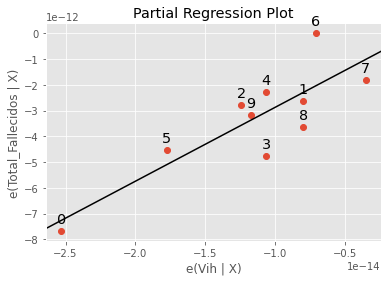

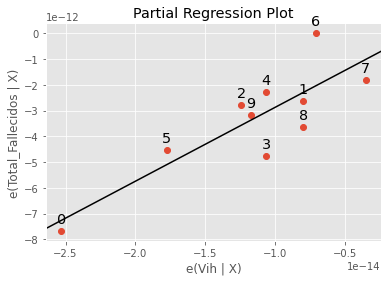

In [340]:
# Grafico Regresion 
sm.graphics.plot_partregress('Total_Fallecidos', 'Vih', 'Edad' , data=df_Comorbilidades, obs_labels=True)


In [341]:
v=df_Comorbilidades['Vih']
f=df_Comorbilidades['Total_Fallecidos']
df_Comorbilidades2=df_Comorbilidades[['Vih','Total_Fallecidos']]
df_Comorbilidades2.loc[:,'VihNormZ']=(v-v.mean())/v.std()
df_Comorbilidades2.loc[:,'TotalNormZ']=(f-f.mean())/f.std()
df_Comorbilidades2

,Vih,Total_Fallecidos,VihNormZ,TotalNormZ
0,1,49,-1.039752,-0.953390
1,1,48,-1.039752,-0.953637
2,11,392,-0.166011,-0.868401
3,19,964,0.532982,-0.726669
4,28,2275,1.319349,-0.401828
5,30,4922,1.494097,0.254051
6,23,9009,0.882479,1.266734
7,11,10332,-0.166011,1.594550
8,5,8634,-0.690255,1.173816
9,0,2342,-1.127126,-0.385226


In [342]:
y, X = dmatrices('TotalNormZ ~ VihNormZ', data=df_Comorbilidades2, return_type='dataframe')


In [343]:
mod12 = sm.OLS(y, X)
res12 = mod12.fit()
print(res12.summary())
# Dado que realizando la normalización mas extrema posible, no logramos cambiar el resultado,
# procedemos a validar si la maquina puede aprender a estimar este resultado. 

                            OLS Regression Results                            
Dep. Variable:             TotalNormZ   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                 -0.066
Method:                 Least Squares   F-statistic:                    0.4451
Date:                Wed, 06 Oct 2021   Prob (F-statistic):              0.523
Time:                        23:10:53   Log-Likelihood:                -13.392
No. Observations:                  10   AIC:                             30.78
Df Residuals:                       8   BIC:                             31.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.776e-17      0.326    8.5e-17      1.0

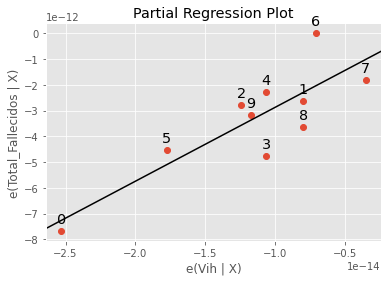

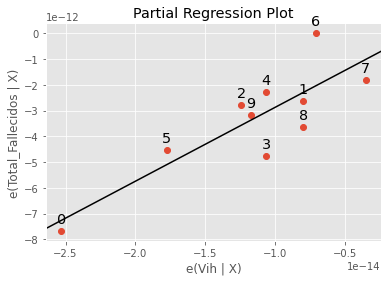

In [344]:
sm.graphics.plot_partregress('Total_Fallecidos', 'Vih', 'Edad' , data=df_Comorbilidades, obs_labels=True)
# Pese a los problemas nunericos, podemos observar que la regresion si logró ajustar los numeros 

In [345]:
print('Parameters:       ', res12.params)
print('Standard errors:  ', res12.bse)
print('Predicted values: ', res12.predict())
# Los valores de la prediccion son relativamente altos, por lo que podemos esperar que se convierta en grandes numeros
# cuando la maquina empiece a 

Parameters:        Intercept    2.775558e-17
VihNormZ     2.295824e-01
dtype: float64
Standard errors:   Intercept    0.326451
VihNormZ     0.344110
dtype: float64
Predicted values:  [-0.23870873 -0.23870873 -0.03811316  0.1223633   0.30289931  0.34301843
  0.20260153 -0.03811316 -0.1584705  -0.25876829]


In [346]:
# division de datos machine learning
# Dividiendo los datos
X = df_Comorbilidades['Vih']
y = df_Comorbilidades['Total_Fallecidos']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


In [347]:
# Creación del modelo utilizando matrices en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
mod12 = sm.OLS(endog=y_train, exog=X_train,)
mod12 = mod12.fit()
print(mod12.summary())
# Desafortunadamente para este caso la maquina no logró aprender a predecir muy bien,
# Sin embargo, nos queda la experiencia de que en el caso de los dos virus, hay que realizar más investigación.


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                 -0.053
Method:                 Least Squares   F-statistic:                    0.6491
Date:                Wed, 06 Oct 2021   Prob (F-statistic):              0.451
Time:                        23:10:55   Log-Likelihood:                -75.964
No. Observations:                   8   AIC:                             155.9
Df Residuals:                       6   BIC:                             156.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2359.6531   1959.048      1.204      0.2

In [348]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
mod12.conf_int(alpha=0.05)


array([[-2433.96351873,  7153.26964118],
       [ -178.32027325,   353.38149774]])

In [349]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = mod12.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,2359.653061,1959.047516,-2433.963519,7153.269641,-7919.532535,12638.838657
1,2447.183673,1879.868855,-2152.689701,7047.057048,-7743.092655,12637.460002
2,2447.183673,1879.868855,-2152.689701,7047.057048,-7743.092655,12637.460002
3,2797.306122,1598.171301,-1113.278171,6707.890416,-7100.954640,12695.566885
4,4810.510204,2061.799466,-234.531340,9855.551748,-5588.304189,15209.324597
5,4985.571429,2233.558744,-479.749927,10450.892784,-5623.511195,15594.654052
6,4372.857143,1679.210485,263.977111,8481.737175,-5605.408824,14351.123110
7,4022.734694,1449.029556,477.087105,7568.382283,-5737.107181,13782.576569


In [350]:
# Intervalo de las predicciones
# ==============================================================================
predicciones = mod12.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')


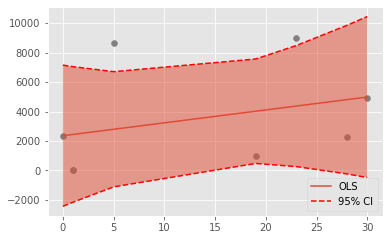

In [351]:
# Gráfico del modelo
# ==============================================================================
fig12, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.5)
ax.legend();


# Las Enfermedes de la AUTOINMUNIDAD
### Otro de los retos para la investigación de las comorbilidades del covid se presenta con los pacientes 
### Que sufren de autoinmunidad, pues ataca varios sistemas del cuerpo, por lo que procederemos a estudiar
### estadisticamente como se relacionan.

y, X = dmatrices('Total_Fallecidos ~ CerebroBascular * HTA * DM * Renal * Tiroides * Obesidad * Fumar * Cardiaca * Respiratoria * Cancer * Vih * Otros', data=df_Comorbilidades, return_type='dataframe'
                )

Text(0.5, 1.0, 'Distribución de muertes Autoinmunidad y Total Fallecidos')

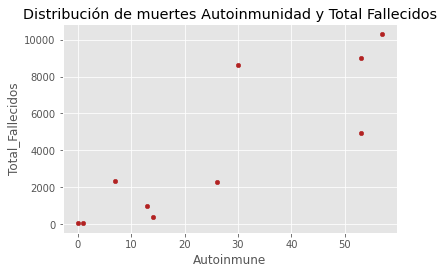

In [352]:
# Gráfico relacion de la autoinmunidad
# ==============================================================================
fig13, ax = plt.subplots(figsize=(6, 3.84))

df_Comorbilidades.plot(
    x    = 'Autoinmune',
    y    = 'Total_Fallecidos',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de muertes Autoinmunidad y Total Fallecidos');


In [353]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = df_Comorbilidades['Autoinmune'], y =  df_Comorbilidades['Total_Fallecidos'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])
# Podemos observar una buena correlación
# y p-value bajo, aunque en realidad la grafica nos muestra una dispersión muy parecida a la de la obesidad y el VIH

Coeficiente de correlación de Pearson:  0.8587012555334783
P-value:  0.0014652970093657735


In [354]:
# Matriz OLS de la relación

y, X = dmatrices('Total_Fallecidos ~ Autoinmune', data=df_Comorbilidades, return_type='dataframe')


In [355]:
# Summary

mod13 = sm.OLS(y, X)
res13 = mod13.fit()
print(res13.summary())


                            OLS Regression Results                            
Dep. Variable:       Total_Fallecidos   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     22.46
Date:                Wed, 06 Oct 2021   Prob (F-statistic):            0.00147
Time:                        23:12:48   Log-Likelihood:                -90.007
No. Observations:                  10   AIC:                             184.0
Df Residuals:                       8   BIC:                             184.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -81.4931   1088.965     -0.075      0.9

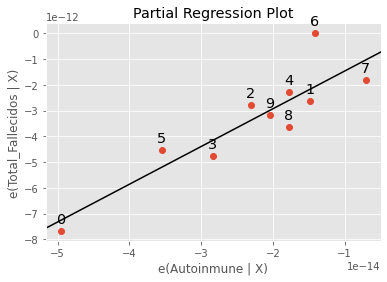

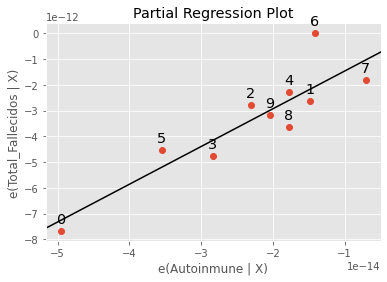

In [356]:
# Grafico dela regresión
sm.graphics.plot_partregress('Total_Fallecidos', 'Autoinmune', 'Edad' , data=df_Comorbilidades, obs_labels=True)


In [357]:
# Predicción simple
print('Parameters:       ', res13.params)
print('Standard errors:  ', res13.bse)
print('Predicted values: ', res13.predict())


Parameters:        Intercept     -81.493146
Autoinmune    156.621777
dtype: float64
Standard errors:   Intercept     1088.965004
Autoinmune      33.047530
dtype: float64
Predicted values:  [  75.12863108  -81.49314633 2111.21173747 1954.58996006 3990.67306645
 8219.46105664 8219.46105664 8845.9481663  4617.16017611 1014.85929557]


In [358]:
# Division de datos machine learning
# Dividiendo los datos
#===================================================================
X = df_Comorbilidades['Autoinmune']
y = df_Comorbilidades['Total_Fallecidos']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


In [359]:
# Creación del modelo utilizando matrices en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
mod13 = sm.OLS(endog=y_train, exog=X_train,)
mod13 = mod13.fit()
print(mod13.summary())
# En terminos generales son bastante pocos los casos de autoinmunes como para poder relacionarlos y hacer que la maquina
# Aprenda a predecri sus R2

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     11.23
Date:                Wed, 06 Oct 2021   Prob (F-statistic):             0.0154
Time:                        23:12:54   Log-Likelihood:                -72.156
No. Observations:                   8   AIC:                             148.3
Df Residuals:                       6   BIC:                             148.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        415.3033   1237.151      0.336      0.7

# Otras Comorbilidades
### Para un estudio tan grande como este hacen falta varias comorbilidades asociadas al covid incluyendo las otras que se generan
### por lo que estudiaremos otro grupo adicional de comorbilidades para saber como se relacionan con la variable dependiente

Text(0.5, 1.0, 'Distribución de muertes otras comorbilidades y Total Fallecidos')

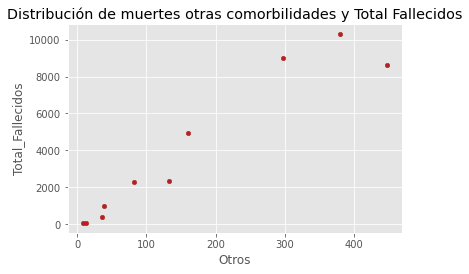

In [360]:
# Gráfico
# ==============================================================================
fig14, ax = plt.subplots(figsize=(6, 3.84))

df_Comorbilidades.plot(
    x    = 'Otros',
    y    = 'Total_Fallecidos',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de muertes otras comorbilidades y Total Fallecidos');


In [361]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = df_Comorbilidades['Otros'], y =  df_Comorbilidades['Total_Fallecidos'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])
# Para este caso tenemos una correlacion extremadamente proxima a 1 y un p-value muy cercano a 0


Coeficiente de correlación de Pearson:  0.959152862299822
P-value:  1.1592473745382413e-05


In [362]:
# Matriz OLS de la relación

y, X = dmatrices('Total_Fallecidos ~ Otros', data=df_Comorbilidades, return_type='dataframe')


In [363]:
#Summary

mod14 = sm.OLS(y, X)
res14 = mod14.fit()
print(res14.summary())
# dada su alta relacionalidad si es conveniente tener esas otras comorbilidades para poder realizar el estudio 

                            OLS Regression Results                            
Dep. Variable:       Total_Fallecidos   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     91.97
Date:                Wed, 06 Oct 2021   Prob (F-statistic):           1.16e-05
Time:                        23:12:58   Log-Likelihood:                -84.065
No. Observations:                  10   AIC:                             172.1
Df Residuals:                       8   BIC:                             172.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.1541    554.167      0.100      0.9

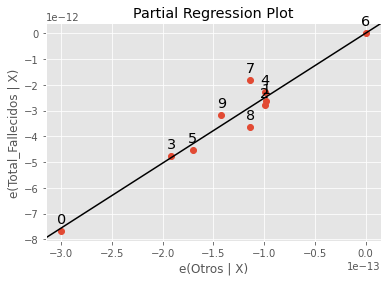

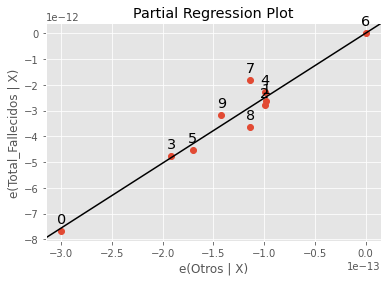

In [364]:
# Grafico de la relacion de las variables
sm.graphics.plot_partregress('Total_Fallecidos', 'Otros', 'Edad' , data=df_Comorbilidades, obs_labels=True)


In [365]:
# Predicción simple
print('Parameters:       ', res14.params)
print('Standard errors:  ', res14.bse)
print('Predicted values: ', res14.predict())


Parameters:        Intercept    55.154124
Otros        24.100037
dtype: float64
Standard errors:   Intercept    554.166651
Otros          2.513043
dtype: float64
Predicted values:  [  344.35456591   247.95441844   922.7554507    970.95552443
  2031.35714655  3911.16002212  7212.8650728   9213.1681327
 10851.97063961  3260.45902673]


In [366]:
# Division de datos machine learning
# Dividiendo los datos
#===================================================================
X = df_Comorbilidades['Otros']
y = df_Comorbilidades['Total_Fallecidos']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


In [367]:
# Creación del modelo utilizando matrices en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
mod14 = sm.OLS(endog=y_train, exog=X_train,)
mod14 = mod14.fit()
print(mod14.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     51.73
Date:                Wed, 06 Oct 2021   Prob (F-statistic):           0.000365
Time:                        23:13:02   Log-Likelihood:                -67.319
No. Observations:                   8   AIC:                             138.6
Df Residuals:                       6   BIC:                             138.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        263.1214    636.550      0.413      0.6

In [368]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
mod14.conf_int(alpha=0.05)


array([[-1294.46146359,  1820.70420298],
       [   14.63950704,    29.73745228]])

In [369]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = mod14.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,3214.189165,448.059953,2117.825957,4310.552372,-60.797122,6489.175452
1,440.629207,619.178125,-1074.445084,1955.703498,-2997.244119,3878.502533
2,529.383126,610.680724,-964.898774,2023.665025,-2899.377772,3958.144023
3,10203.560259,1029.427160,7684.642744,12722.477773,6220.035645,14187.084872
4,2082.576702,489.231910,885.469345,3279.684059,-1227.497153,5392.650557
5,3813.278116,447.629588,2717.967973,4908.588259,538.644211,7087.912020
6,6853.099829,642.077472,5281.992856,8424.206803,3390.167543,10316.032116
7,1106.283597,558.950755,-261.419629,2473.986823,-2269.236365,4481.803559


In [370]:

# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = mod14.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')


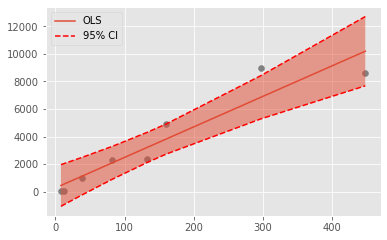

In [371]:
# Gráfico del modelo
# ==============================================================================
fig14, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.5)
ax.legend();


In [372]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = mod11.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")



El error (rmse) de test es: 6407.175499476579


# Una buena forma de obtener un resumen completo es generar una matriz y sus histogramas para poder realizar las comparaciones, 
# En este caso lo haremos por medio de una matriz de correlacion tidy la cual relaciona todas las varialbles y nos genera un accuracy de la misma.


In [373]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = df_Comorbilidades.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix)#.head(10)

,variable_1,variable_2,r,abs_r
243,Total_Fallecidos,Renal,0.997576,0.997576
63,Renal,Total_Fallecidos,0.997576,0.997576
128,Respiratoria,CerebroBascular,0.995766,0.995766
8,CerebroBascular,Respiratoria,0.995766,0.995766
244,Total_Fallecidos,Tiroides,0.994931,0.994931
...,...,...,...,...
27,HTA,Vih,0.067065,0.067065
203,Otros,Vih,0.055752,0.055752
188,Vih,Otros,0.055752,0.055752
183,Vih,Cardiaca,-0.053286,0.053286


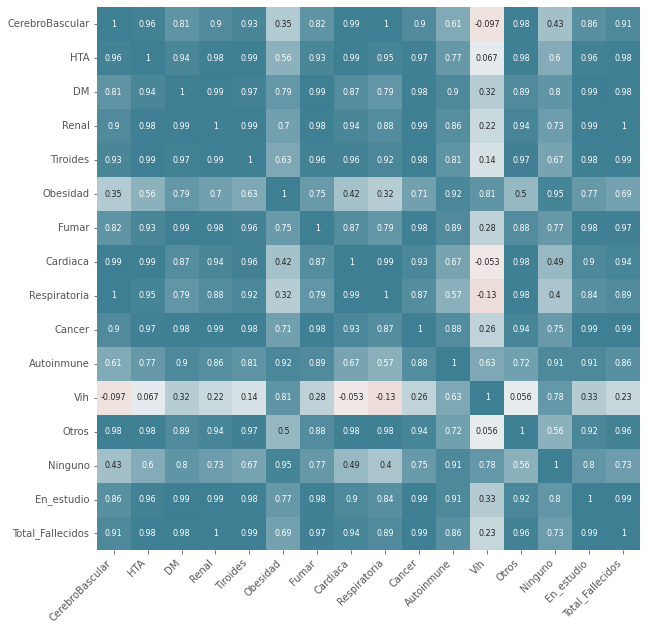

In [374]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

# Por ultimo los graficos de la distribuciones 

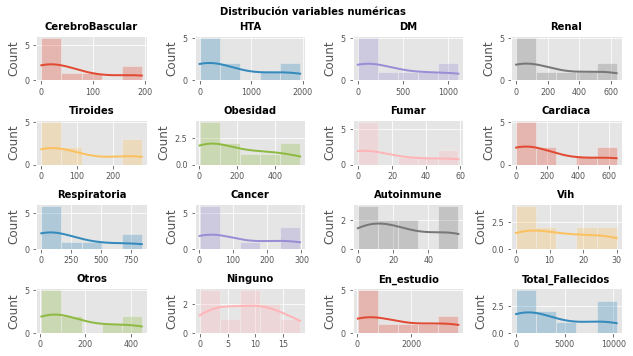

In [375]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(9, 5))
axes = axes.flat
columnas_numeric = df_Comorbilidades.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df_Comorbilidades,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*4)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");